# Working Prototype of
Morse Code to Analog converter

ADC

DAC

My Code is still messy, but it's working now

In [11]:
from typing import Optional, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

# Morse Code dictionary

In [12]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-'}

In [13]:
# Function to encrypt the string
# according to the morse code chart
def encrypt(message):
    cipher = ''
    for letter in message:
        if letter != ' ':

            # Looks up the dictionary and adds the
            # corresponding morse code
            # along with a space to separate
            # morse codes for different characters
            cipher += MORSE_CODE_DICT[letter] + ' '
        else:
            # 1 space indicates different characters
            # and 2 indicates different words
            cipher += ' '

    return cipher

In [14]:
def plot(x,y,style):
     plt.figure(figsize=[9, 4.5])
     fig, ax = plt.subplots()
     if style == "plot":
          ax.plot(x,y)

     if style == "stem":
          ax.stem(x,y)

     if style == "stairs":
          ax.stairs(y,linewidth=2)

     ax.set(xlim=(T_REF_START,T_REF_END), xticks=np.arange(T_REF_START, T_REF_END),
          ylim=(-2, 2), yticks=np.arange(-2, 2))
     plt.show()
     return (True)

In [15]:
def analog_digital_converter(Ts,
                             t_ref,
                             analog_ref,
                             dis_t,
                             dis_signal):
    # Get Sampling Period: how many data points to skip till next sampling point
    # Get data array in time and the continues signal


    # index position in arrays

    # in continues time Data Arrays
    i = 0
    # in discrite time Data Arrays
    x = 0


    while (0 <= i <= (t_ref.size) - 1):
      # Check if index within array range

      # copy value from continues Data Array into discrite Data array
      # mapping a time stamp from continues time data to discrite Data domain
        dis_t[x] = t_ref[i]
      # mapping a signal to that spesific time stamp in discrite data domain
        dis_signal[x] = analog_ref[i]

      # check if index still in array size range
        if (((dis_t.size) - 1) <= x):
            return
      # skip to the next sampling time stamp
      # skip to the next index in continues time data arrays
        i = i + Ts
      # to the next data position in discrite time data arrays
        x = x + 1
    return

# Define User value

Sampling period is the ADC sampling period in s

Sender Period is the Morse code Operation protocal 0.2s as a short beep "." Can consider as the Signal minimum "period"
And therefore the sampling freuquency for an ADC at the reciver end must higer than the analog Morse operator freq.

In another words, ADC sampling Period must be smaller than the Morse-Operation minimum Period 0.2s


Plotted graph is the Morse Signal in continues time domain

 ..  .-.. --- ...- .  -.-. ...  ..--- 


<Figure size 900x450 with 0 Axes>

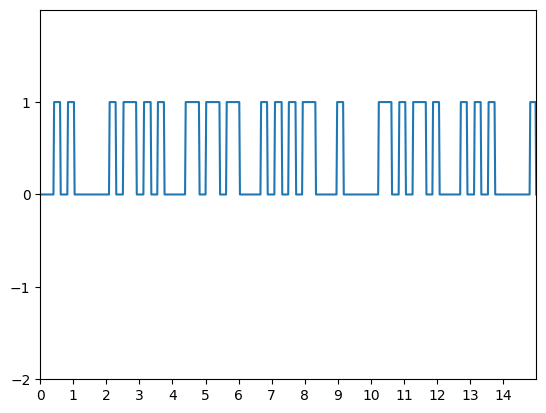

In [16]:
# Define your Value below! ---------------------------------------------------
# reference Time span in [s]
T_REF_START = 0
T_REF_END = 15

# Data storage resolution in [s]
T_RESOLUTION = 0.02

# ADC Sampling resolution in [s]
SAMPLING_PERIOD = 0.3


# Message to send
MESSAGE = " I love CS 2"

# Morse Sender Period
SENDER_PERIOD = 0.2



# Define your Values above! --------------------------------------------------





# Convertion of the User defined value
# Get the total time span
Time_span = T_REF_END - T_REF_START
# Calculate how many elements should it be in the continues Data Arrays
t_steps = int (Time_span / T_RESOLUTION)


"""
Calculate how many elements in the continues Data Arrays to skip
till the next Data element, which to be sampled by ADC
"""
Skip_steps = int (SAMPLING_PERIOD/(float(Time_span/t_steps)))

# Generate a "continues" time span array for plotting and continues data storage
t_ref = np.linspace(T_REF_START,T_REF_END,t_steps + 1)


code = encrypt(MESSAGE.upper())
print(code)


def code_to_signal(t_ref,
                   signal_ref,
                   code,
                   period):


  e = 0
  i = 0

  while ((e < len(code)) and (i < t_ref.size - 1)):
    if code[e] == '.':
      #if a dot, send short signal

      on_end = t_ref[i] + period
      off_end = t_ref[i] + 2*period

    if code[e] == "-":
      on_end = t_ref[i] + 2*period
      off_end = t_ref[i] + 3*period


    if code[e] == " ":
      on_end = t_ref[i]
      off_end = t_ref[i] + 2*period


    while ((t_ref[i] < on_end) and (i < t_ref.size - 1)):
      signal_ref[i] = 1
      i = i + 1


    while ((t_ref[i] <= off_end) and (i < t_ref.size - 1)):
      signal_ref[i] = 0
      i = i + 1


    e = e + 1


  return



Morse_Signal_ref = np.zeros(t_ref.size)
code_to_signal(t_ref, Morse_Signal_ref, code, SENDER_PERIOD)

#print(t_ref.size)
#print(Morse_Signal_ref.size)
#print(Morse_Signal_ref)

plot(t_ref,Morse_Signal_ref,"plot")

# Mapping a "continues analog" signal to the time array for each time step
analog_ref = np.sin(t_ref) + np.sin(2*t_ref)

# ADC Converter operation

Here run the ADC

and plot the Digital signal in discrite time domain


<Figure size 900x450 with 0 Axes>

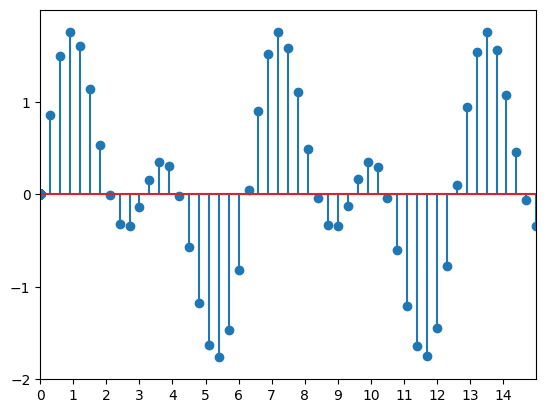

<Figure size 900x450 with 0 Axes>

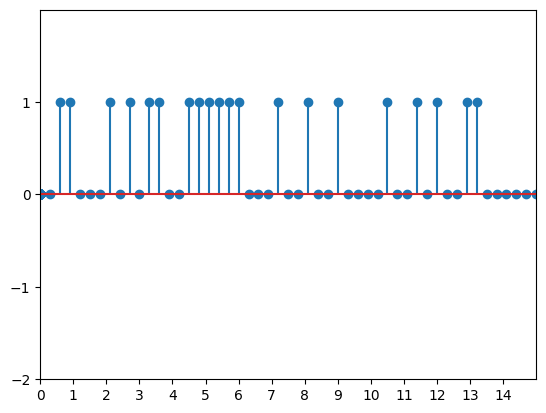

True

In [20]:

Ts = Skip_steps
Dis_t = np.zeros(10000)

Dis_signal = np.zeros(10000)
Dis_Morse = np.zeros(10000)



analog_digital_converter(Skip_steps,t_ref,analog_ref,Dis_t,Dis_signal)
analog_digital_converter(Skip_steps,t_ref,Morse_Signal_ref,Dis_t,Dis_Morse)

#plot(t_ref,analog_ref,"plot")
plot(Dis_t,Dis_signal,"stem")
plot(Dis_t,Dis_Morse,"stem")



# DAC

Here is DAC Function with 0-oder hold and convert back a discrite time signal into analog signal.

Also plotting the Digital to Analog signal in continues Time Domain
while comparing with its original Analog Signal in continues Time Domain.


So basically just comparing the Analog Original signal before ADC-DAC with the Analog output after ADC-DAC

<Figure size 900x450 with 0 Axes>

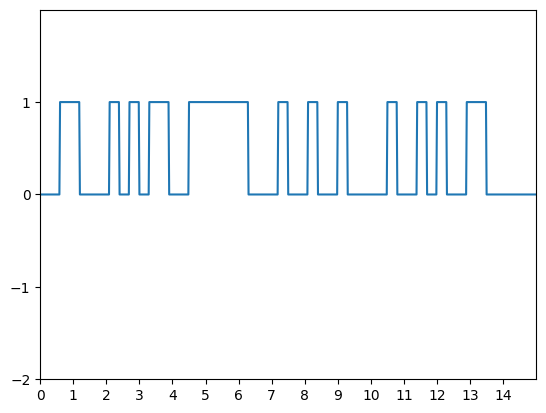

<Figure size 900x450 with 0 Axes>

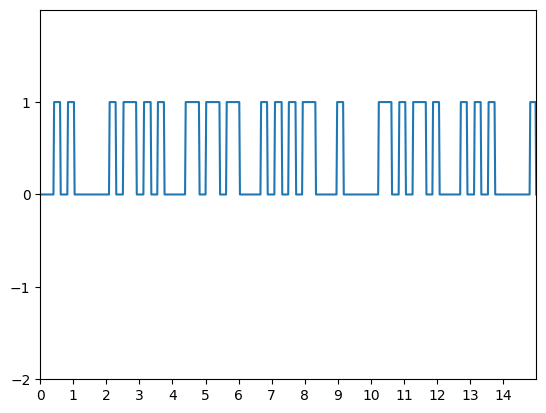

True

In [18]:
def digital_analog_converter_o_order_hold(d_t,
                                          d_sig,
                                          t_ref,
                                          out_ref):
  i = 0
  x = 0

  while (i < (t_ref.size) - 1 and x < (d_t.size) - 1):
    if (t_ref[i] < d_t[x]):
      out_ref[i] = d_sig[x - 1]
      i = i + 1
    else:
      out_ref[i] = d_sig[x]
      x = x + 1
      i = i + 1
  return

Out_ref = np.zeros(t_steps + 1)

digital_analog_converter_o_order_hold(Dis_t,Dis_signal,t_ref,Out_ref)

#plot(t_ref,analog_ref,"plot")
#plot(Dis_t,Dis_signal,"stem")
#plot(t_ref,Out_ref,"plot")

Morse_Recive_ref = np.zeros(t_steps + 1)
digital_analog_converter_o_order_hold(Dis_t,Dis_Morse,t_ref,Morse_Recive_ref)

plot(t_ref,Morse_Recive_ref,"plot")
plot(t_ref,Morse_Signal_ref,"plot")


# How to increase Data transfer rate?
we can see, by increasing the frequency (shorten the morse code sender operation period), we can pack more data in a give time period, hence we can transfer more data if we increase the frequency.

But we can't always increase the frequency due to many limitation. On of the limitation is the low pass property of the physical wires, also explain the limit of internet speed using a co-axis wire. 

Calculate the maximum bandwidth frequency and convert it to the period and try to see if all the morse code data can still be decoded on the receiver side.

# Sensor signal filtering (Data post-processing)

Raw sensor data is full with noise and it need to be filtered to be used.

For example, we know in our Morse signal, it's either an "on" or "off", so anything that is between is probably due to noise or some other factors. 

Therefore, to have a clean data array, we need to set a threshold: when it is an "on" for us, and when is it an "off".

Assume you receive data coming with time and signal value as two separated but same-sized arrays.

#### Import the data 
You do not need to make any changes here. Just run the code.


In [87]:
import copy
# To protect the original data, use the "copy" package

# Here we just use the data generated before as our Time array.
Time_Stamp = copy.copy(Dis_t)
# Used the ADC sampled data from before as well.
Data_Raw = copy.copy(Dis_signal)

### Exercise: (Your Code Here)
Now implement a simple function to filter the data in the array. This is the basic trick to sort out the "out of range" data. or setting a threshold for accepted data and normalizing it to a certain value.

In [88]:
"""""
# inputs: 
    raw sensor data as np.array; 
    minimum threshold; 
    normalize value after threshold;
    idle value when data is lower than the threshold
# output: 
    filtered data as np.array with the same size as input raw data np.array.
# TASK: 
    Do a simple clean-up process for the sensor's raw data.
    If the signal value is lower than the threshold, set the value to idle value.
    If the signal value is higher than the threshold, set the value to the normalized value
"""
def easy_data_post_processing(data_raw: np.array,
                              min: float,
                              normalization: float,
                              idle: float):
    
    # Create an array to save the filtered data with the same size as the raw data array
    data_filtered = np.zeros(data_raw.size)
    
    # Your code here: ----------------------------------------------
    
    

    
    return data_filtered

### Solution:

In [89]:
"""""
# inputs: 
    raw sensor data as np.array; 
    minimum threshold; 
    normalize value after threshold;
    idle value when data is lower than the threshold
# output: 
    filtered data as np.array with the same size as input raw data np.array.
# TASK: 
    Do a simple clean-up process for the sensor's raw data.
    If the signal value is lower than the threshold, set the value to idle value.
    If the signal value is higher than the threshold, set the value to the normalized value
"""
def easy_data_post_processing_sol(data_raw: np.array,
                                  min: float,
                                  normalization: float,
                                  idle: float):
    
    # Create an array to save the filtered data with the same size as the raw data array
    data_filtered = np.zeros(data_raw.size)
    
    # check for each value and normalize or set it to idle value in the filtered data array
    for i in range(data_raw.size - 1):
        if min <= data_raw[i]:
            data_filtered[i] = normalization
        else:
            data_filtered[i] = idle
        i += 1 
    return data_filtered

### Run the Test:
Your solution and compare it with the master solution.

<Figure size 900x450 with 0 Axes>

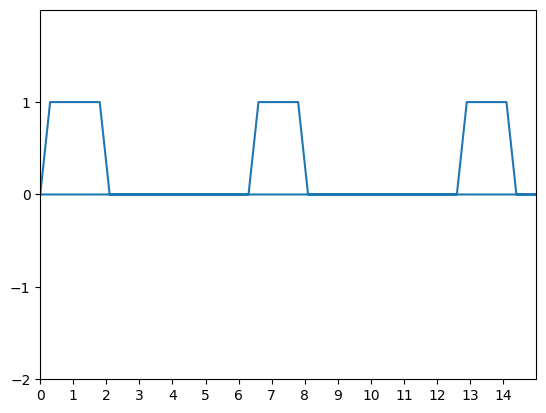

TypeError: easy_data_post_processing() missing 4 required positional arguments: 'data_raw', 'min', 'normalization', and 'idle'

In [90]:
Data_Filtered_sol = easy_data_post_processing_sol(Data_Raw,0.5,1,0)
# ----------------------------------------- To do
# Set the name for the plot

# Uncomment the line below to see the raw data plot.
#plot(Time_Stamp,Data_Raw,"stem")
plot(Time_Stamp,Data_Filtered_sol,"plot")



# Modify your function matching with your coded function before and run the test.
Data_Filtered = easy_data_post_processing()
plot(Time_Stamp,Data_Filtered,"plot")









## Now use a Python package tool
Use Python tool to do the data filtering
1. using control package
2. using scipy package

Keep in mind that the control package is more oriented towards continuous-time systems, so when working with discrete-time signals, you need to provide the sampling time (dt) to ensure correct behavior. Also, the butter function in control assumes a normalized cutoff frequency, so you may need to adjust the cutoff frequency accordingly.

If your primary goal is signal processing and you need more flexibility in designing filters, you might still consider using the scipy library, as it offers a broader range of signal processing tools.


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\elias\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.2/44.1 MB 2.0 MB/s eta 0:00:23
     ---------------------------------------- 0.5/44.1 MB 4.7 MB/s eta 0:00:10
      --------------------------------------- 1.0/44.1 MB 5.5 MB/s eta 0:00:08
     - -------------------------------------- 2.1/44.1 MB 9.4 MB/s eta 0:00:05
     -- ------------------------------------- 2.4/44.1 MB 8.6 MB/s eta 0:00:05
     --- ------------------------------------ 4.0/44.1 MB 12.8 MB/s eta 0:00:04
     ---- ----------------------------------- 4.6/44.1 MB 14.0 MB/s eta 0:00:03
     ---- ----------------------------------- 4.8/44.1 MB 12.3 MB/s eta 0:00:04
     ---- ----------------------------------- 4.8/44.1 MB 12.3 MB/s eta 0:00:04
     ----- ---------------------------------- 6.5/44.1 MB 13.0 MB/s eta 0:00:03
     ------ --------------------------------- 6.7/44.1 MB 13.

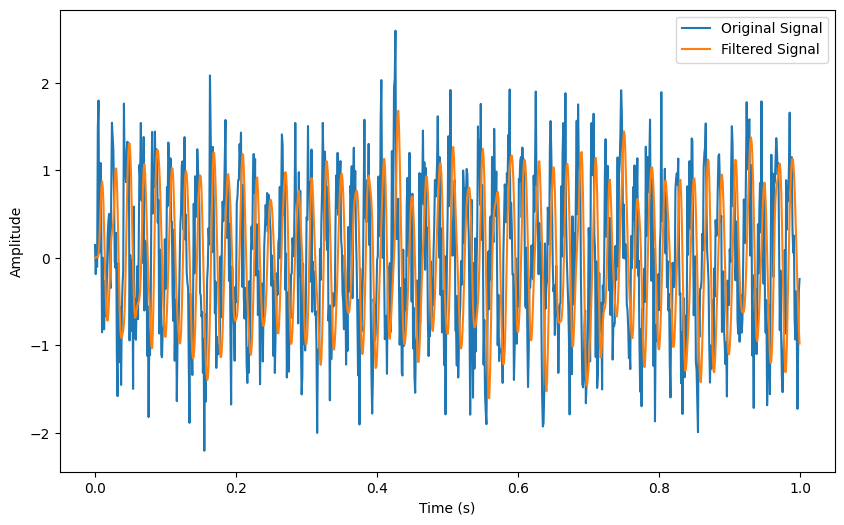

In [ ]:
%pip install scipy


This is b:
[0.00482434 0.01929737 0.02894606 0.01929737 0.00482434] 

[ 1.         -2.36951301  2.31398841 -1.05466541  0.18737949]


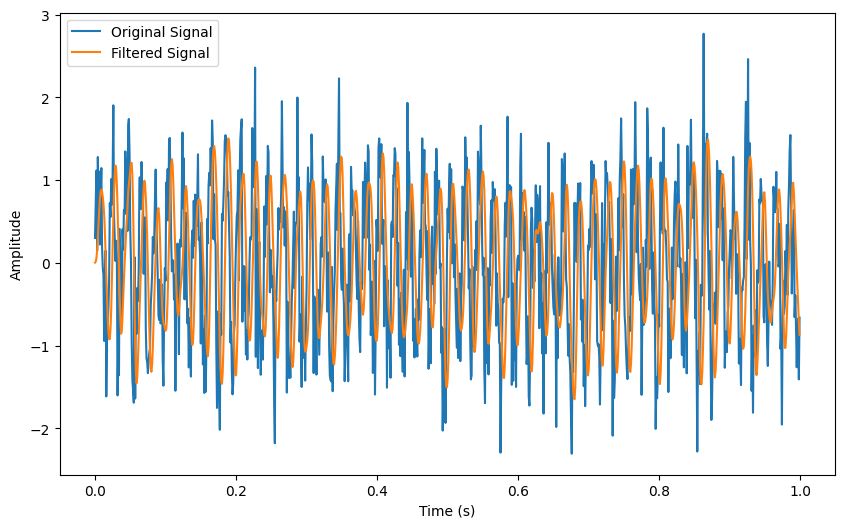

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Generate a sample discrete signal (replace this with your sensor data)
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=len(t))

# Function to apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_frequency, sampling_frequency, order=4):
    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    print("This is b:")
    print(b , '\n')
    print(a)
    y = lfilter(b, a, data)
    return y

# Set the cutoff frequency for the low-pass filter
cutoff_frequency = 100  # Adjust this based on your requirements

# Apply the low-pass filter
filtered_signal = butter_lowpass_filter(signal, cutoff_frequency, fs)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
